# Import Required Packages

In [1]:
# Imports
import os
import datetime
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time



# Input data from User

In [19]:
#Market analysed: 'Investment','FullYear','DayAhead','Balancing' (choose one or several)
market_analysed=['DayAhead','Balancing'] 
output='CurtailmentHourly'
first_timestep="2012-01-02"
#Number of timesteps (total number of combination of SSS and TTT)
number_periods=8736*12 
#Time size of each time step for creating timestamp
size_timestep="300s"
#Time size of each TTT calculating energy values
size_t=1/12;
#Countries in focus
ccc_in_focus = ['DENMARK', 'GERMANY', 'NORWAY', 'GREAT_BRITAIN','BELGIUM','HOLLAND']




# Plot Settings

In [3]:
# Set plotting specifications
% matplotlib inline
plt.rcParams.update({'font.size': 21})
plt.rcParams['xtick.major.pad']='12'
plt.rc('legend', fontsize=16)
y_limit = 1.1
lw = 3

# Read Input Files

In [4]:
data=pd.DataFrame()
for market in market_analysed:
    csvfiles = []
    for file in glob.glob("./input/results/" + market + "/*.csv"):
        csvfiles.append(file)

    csvfiles=[file.replace('./input\\','') for file in csvfiles] 
    csvfiles=[file.replace('.csv','') for file in csvfiles]  
    csvfiles=[file.split('_') for file in csvfiles]  
    csvfiles = np.asarray(csvfiles)  
    csvfiles=pd.DataFrame.from_records(csvfiles)
    
    csvfiles.rename(columns={0: 'Output', 1: 'Scenario',2: 'Year',3:'Subset'}, inplace=True)
    scenarios=csvfiles.Scenario.unique().tolist()
    years=csvfiles.Year.unique().tolist()
    subsets=csvfiles.Subset.unique().tolist()

    for scenario in scenarios:
        for year in years:
            for subset in subsets:
                file = "./input/results/"+ market + "/"+ output + "_" + scenario + "_" + year + "_" + subset + ".csv"
                if os.path.isfile(file):
                    df=pd.read_csv(file,encoding='utf8')
                    df['Scenario'] = scenario
                    df['Market']   = market
                    #Renaming columns just in case timeconversion was required
                    df.rename(columns = {'G':'GGG', 'C':'CCC', 'Y':'YYY','TTT_NEW':'TTT','SSS_NEW':'SSS'}, inplace = True) 
                    data=data.append(df) 

                
                

In [5]:
#Timestamp addition
full_timesteps = pd.read_csv('./input/full_timesteps.csv')
full_timesteps.Key=full_timesteps['SSS']+full_timesteps['TTT']
full_timesteps['timestamp']= pd.date_range(first_timestep, periods = number_periods, freq =size_timestep)
dict_timestamp=dict(zip(full_timesteps.Key, full_timesteps.timestamp))
data['timestamp']=data['SSS']+data['TTT']
data['timestamp']=data['timestamp'].map(dict_timestamp)



C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data.to_csv(r'./output/test.csv')

# Additional set declaration

In [6]:
ccc = list(data.CCC.unique())
rrr = list(data.RRR.unique())
tech_type = list(data.TECH_TYPE.unique())
commodity = list(data.COMMODITY.unique())
fff = list(data.FFF.unique())
sss = list(full_timesteps.SSS.unique())
ttt = list(full_timesteps.TTT.unique())


# Time step selection

In [7]:
# Seasons to investigate
# season_names = ['S01', 'S07', 'S20', 'S24', 'S28', 'S38', 'S42', 'S43']
# Make a list of every nth element of sss (1 <= nth <= number of elements in sss)
nth = 1
s = sss[0::nth]
 # Or select seasons by names
# s = season_names


In [8]:
# Terms to investigate
# term_names = ['T005', 'T019', 'T033', 'T047', 'T061', 'T075', 'T089', 'T103', 'T117', 'T131', 'T145', 'T159']
# Make a list of every nth element of ttt (1 <= nth <= number of elements in ttt)
nth = 1
t = ttt[0::nth]
# Or select terms by name
# t = term_names

# Make Directories


In [9]:
# Make output folder
if not os.path.isdir('output'):
    os.makedirs('output')

In [10]:
# Make CurtailmentHourly folder
if not os.path.isdir('output/' + output):
    os.makedirs('output/' + output)

In [11]:
# Make market folder
for market in market_analysed:
    if not os.path.isdir('output/' + output + '/'+ market +'/Country_wise'):
        os.makedirs('output/' + output + '/'+ market +'/Country_wise')
# Make country folder
    if not os.path.isdir('output/' + output  + '/'+ market +'/Country_wise'):
        os.makedirs('output/' + output  + '/'+ market  +'/Country_wise')
    # Make country wise folders
    for c in ccc:
        if not os.path.isdir('output/' + output  + '/'+ market +'/Country_wise/' + c):
            os.makedirs('output/' + output  + '/'+ market +'/Country_wise/' + c)

# Plotting

In [20]:
# Make data frames to plot
data_plot = data[(data.SSS.isin(s)) & (data.TTT.isin(t))]
data_plot = data[data.CCC.isin(ccc_in_focus)]

## Plot per year, scenario, market 

In [61]:
df_plot=(pd.DataFrame(data_plot.groupby(['YYY', 'Scenario', 'Market'])['Val'].agg('sum')/1000000*size_t))

In [54]:
df_plot

Val
YYY  Scenario     Market              
2020 OffshoreGrid Balancing  11.724462
2030 OffshoreGrid Balancing   6.821968
     ProjectBased Balancing   5.889019
2050 OffshoreGrid Balancing  48.553536
     ProjectBased Balancing  42.470880
                  DayAhead   43.011371

In [65]:
df_plot.reset_index(inplace=True)

In [66]:
df_plot

,YYY,Scenario,Market,Val
0,2020,OffshoreGrid,Balancing,11.724462
1,2030,OffshoreGrid,Balancing,6.821968
2,2030,ProjectBased,Balancing,5.889019
3,2050,OffshoreGrid,Balancing,48.553536
4,2050,ProjectBased,Balancing,42.470880
5,2050,ProjectBased,DayAhead,43.011371


<BarContainer object of 6 artists>

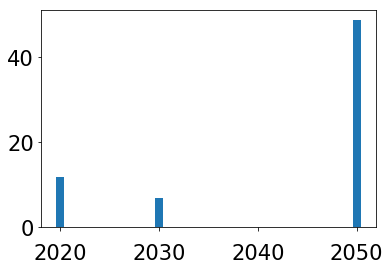

In [67]:
for scenario in Scenarios:
    df_plot
plt.bar(df_plot.YYY, df_plot.Val)


In [ ]:
for i in years:
    spp_plot[data.SSS.isin([i])][ccc[:2]].plot(figsize=(16,9), lw=lw)
    plt.ylim([0, y_limit])
    plt.legend(loc=1)
    plt.title('Curtailment in ' +  i)
    plt.xlabel('Terms')
    plt.xticks(t_marker, t_selected, rotation=45)
    for x_pos in t_marker:
        plt.axvline(x=x_pos, c='black', lw=6, alpha=0.3)
    plt.tight_layout()
    plt.savefig('output/pv_production/spp_' + i + '.png', compression=None)
    # plt.show()
    plt.close()
plt.close()

In [ ]:
#Plot example with several x axis

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

# Add some extra space for the second axis at the bottom
fig.subplots_adjust(bottom=0.2)
ax1.set_xticks([1,2,4,5,7,8])
ax1.set_xlim(0,9)
ax1.set_xticklabels(('2015','2016','2015','2016','2015','2016'))
ax2.spines["bottom"].set_position(("axes", -0.15))
ax2.xaxis.set_ticks_position("bottom")
ax2.spines["bottom"].set_visible(True)
ax2.set_xticks([1.5,4.5,7.5])
ax2.set_xticklabels(('1','2','3'))
ax2.set_xlim(0,9)

b1 = np.random.randint(0,100,6)
b2 = np.random.randint(0,100,6)
b3 = np.random.randint(0,100,6)
plt.bar(np.array([1,2,4,5,7,8])-0.4,b1,color='blue')
plt.bar(np.array([1,2,4,5,7,8])-0.4,b2,color='orange',bottom=b1)
plt.bar(np.array([1,2,4,5,7,8])-0.4,b3,color='yellow',bottom=b1+b2)

plt.show()